In [ ]:
# http://nipy.org/dipy/examples_built/syn_registration_2d.html

In [3]:
import numpy as np
from dipy.data import get_fnames
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric, EMMetric
import dipy.align.imwarp as imwarp
from dipy.viz import regtools

import skimage.data

fname_moving = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/\
MD594_prep2_thumbnail_mask/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_prep2_thumbnail_mask.png'
fname_static = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/\
MD589_prep2_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_thumbnail_mask.png'

moving = skimage.data.load(fname_moving)[0:347,0:485]
static = skimage.data.load(fname_static)[0:347,0:485]

visually check the overlap of the static image with the transformed moving image, we can plot them on top of each other with different channels to see where the differences are located

In [ ]:
skimage.data.load('/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/\
MD594_prep2_thumbnail_mask/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_prep2_thumbnail_mask.png')[::2,::2]

skimage.data.load('/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/\
MD589_prep2_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep2_thumbnail.tif')[::2,::2]

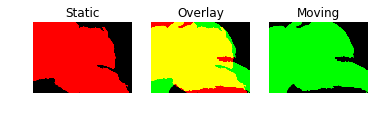

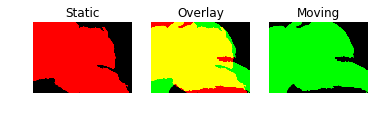

In [12]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving', 'input_images.png')

We want to find an invertible map that transforms the moving image (circle) into the static image (the C letter).

The first decision we need to make is what similarity metric is appropriate for our problem. 
In this example we are using two binary images, so the Sum of Squared Differences (SSD) is a good choice.

In [13]:
dim = static.ndim
metric = SSDMetric(dim)

Now we define an instance of the registration class. The SyN algorithm uses a multi-resolution approach by building a Gaussian Pyramid. We instruct the registration instance to perform at most [n0,n1,...,nk] iterations at each level of the pyramid. The 0-th level corresponds to the finest resolution.

In [14]:
level_iters = [200, 100, 50, 25]

sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter = 50)

Now we execute the optimization, which returns a DiffeomorphicMap object, that can be used to register images back and forth between the static and moving domains

In [15]:
mapping = sdr.optimize(static, moving)

Creating scale space from the moving image. Levels: 4. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 4. Sigma factor: 0.200000.
Optimizing level 3
Optimizing level 2
Optimizing level 1
Optimizing level 0


It is a good idea to visualize the resulting deformation map to make sure the result is reasonable (at least, visually)

(array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 127.00001 , 126.99999 , ..., 127.      , 127.      ,
           0.      ],
        [  0.      , 127.00001 , 127.      , ..., 127.      , 127.      ,
           0.      ],
        ...,
        [  0.      , 119.10877 , 127.      , ..., 127.      , 127.00001 ,
           0.      ],
        [  0.      , 122.978325, 127.      , ..., 127.      , 127.      ,
           0.      ],
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
           0.      ]], dtype=float32),
 array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 109.02958, 109.31248, ..., 127.     , 127.     ,
           0.     ],
        [  0.     , 114.10844, 127.     , ..., 127.     , 127.     ,
           0.     ],
        ...,
        [  0.     , 127.     , 127.     , ..., 127.     , 113.73624,
           0.     ],
        [  0.     , 1

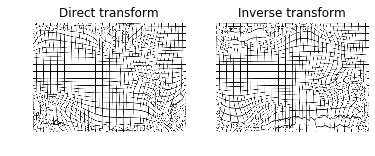

In [16]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

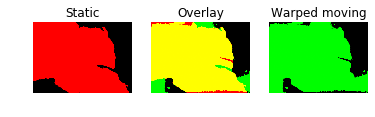

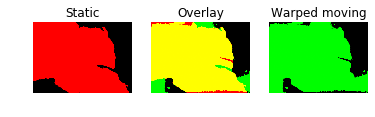

In [17]:
warped_moving = mapping.transform(moving, 'linear')
regtools.overlay_images(static, warped_moving, 'Static','Overlay','Warped moving',
   'direct_warp_result.png')

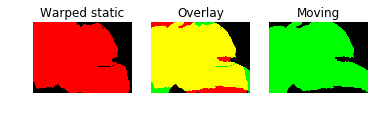

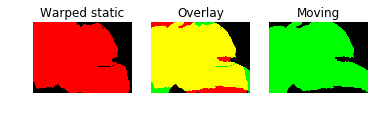

In [18]:
warped_static = mapping.transform_inverse(static, 'linear')
regtools.overlay_images(warped_static, moving,'Warped static','Overlay','Moving',
   'inverse_warp_result.png')